#국민대학교 소프트웨어학부 컴퓨터비전 중간고사 과제 (40점)
- 아래의 코드를 작성하시어 제출하시기 바람
- 제출기한은 10월 28일 자정까지이며, 추가 연장없음
- 다른 사람의 코드를 배끼거나 불공정 행위가 발견될시 무조건 F 처리됨

##Otsu 알고리즘 구하기 (20점)
- 주어진 영상을 읽고 gray 영상으로 변환하기
- Gray 영상으로부터 히스토그램, 정규화된 히스토그램, 누적 히스토그램 함수 작성하기
- 오추 알고리즘 작성하기
- 결과 영상 가시화

##영상 라벨링 (20점)
- 주어진 영상을 읽기
- 4연결성 기준 영상 라벨링
- 8연결성 기준 영상 라벨링 
- 결과 영상 가시화

#Otsu 알고리즘
##1단계: 컬러 영상 읽고 RGB channel 및 gray 영상을 구하시오 
- 첨부된 highway.jpg 영상을 사용하시오
- 영상 읽고 gray 영상으로 변환하기 (opencv 및 matplotlib 모두 사용 가능함)

##영상을 읽은 후 
- gray 영상은 gray_img로 저장하시오 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

1536 2048


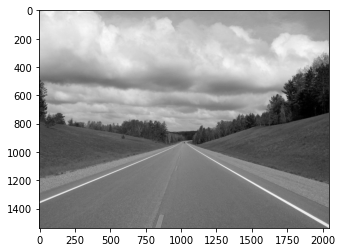

In [10]:
#영상을 읽은 gray 영상을 저장하기 위한 코드를 작성하시오
img = cv2.imread('highway.jpg') #영상 읽기
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #흑백 영상으로 변환

#주어진 gray 영상의 가로 길이를 width, 세로 길이를 height로 저장, gray 영상으로 잘 변환되었는지 확인
height, width = gray_img.shape
print(height, width)
plt.imshow(gray_img, cmap='gray')
plt.show()

##2단계: 히스토그램, 정규화된 히스토그램, 정규화된 누적히스토그램 함수 작성
- 히스토그램 구하기 위한 함수를 histogram 함수 이름으로, 정규화된 히스토그램 함수를 normal_histogram, 정규화된 누적히스토그램 함수를 normal_CDF 이름으로 함수를 작성하시오

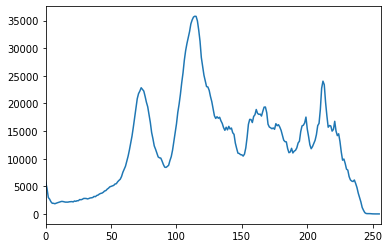

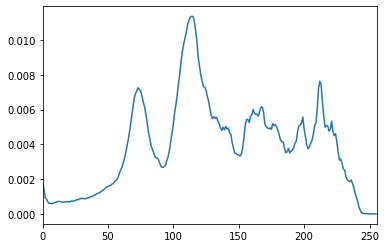

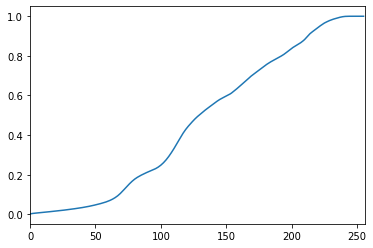

In [11]:
#히스토그램 구하기 위한 함수를 작성하시오 (도수는 256의 크기를 갖고 있음)
def histogram(img):
  img_hist = np.zeros(256, np.float64)
  for i in range(0, height):
      for j in range(0, width):
          img_hist[img[i][j]] += 1

  return img_hist

#정규화된 히스토그램 구하기 위한 함수를 작성하시오
def normal_histogram(img):
  img_hist_norm = np.zeros(256, np.float64)

  for i in range(0, height):
      for j in range(0, width):
          img_hist_norm[img[i][j]] += 1
  img_hist_norm = img_hist_norm / (width * height)
  return img_hist_norm


#정규화된 히스토그램으로부터 누적히스토그램을 구하기 위한 함수를 작성하시오
def normal_CDF(img):
  img_norm_CDF = normal_histogram(img)

  for i in range(1, 256):
      img_norm_CDF[i] += img_norm_CDF[i-1]
  return img_norm_CDF  


#아래 코드를 참고하여 자신이 구한 함수의 결과가 아래의 결과와 같은지 확인하시기 바랍니다.
hist = cv2.calcHist([img],[0],None,[256],[0,256]) #히스토그램
hist_norm = hist.ravel()/(height*width) #정규화된 히스토그램
CDF = hist_norm.cumsum() #CDF

bins = histogram(gray_img)
plt.plot(bins)
plt.xlim([0,256])
plt.show()

bins = normal_histogram(gray_img)
plt.plot(bins)
plt.xlim([0,256])
plt.show()

bins = normal_CDF(gray_img)
plt.plot(bins)
plt.xlim([0,256])
plt.show()


#3단계: Otsu 알고리즘의 초기화
- 알고리즘을 구하기 전에 필요시 아래와 같은 변수를 활용하여도 좋으며, 필요없으면 사용하지 않아도 됨
- 알고리즘 구현시 np.hsplit: 주어진 배열을 두개로 나눌 때 활용 가능

In [12]:
#initialization
bins = np.arange(256)
fn_min = np.inf
thresh = -1

In [13]:
#Otsu algorithm 코드를 작성하어 threshold 값을 구하시오
for i in range(1, 255):
    h0, h1 = np.hsplit(hist_norm, [i])  # 히스토그램 배열을 하위 두 배열로 분할하여 각각 h0, h1에 대입
    w0 = CDF[i]  # w0는 왼쪽 히스토그램 분산의 가중치 값
    w1 = CDF[255] - CDF[i]  # w1은 오른쪽 히스토그램 분산의 가중치 값
    i0, i1 = np.hsplit(bins, [i])

    u0 = np.sum(h0 * i0) / w0
    u1 = np.sum(h1 * i1) / w1
    v0 = np.sum(((i0 - u0) ** 2) * h0) / w0
    v1 = np.sum(((i1 - u1) ** 2) * h1) / w1

    t = w0 * v0 + w1 * v1  # 분산의 가중치 합 - 목적함수로 이용
    if t < fn_min:  # 쓰레쉬홀드 최솟값 구하기
        fn_min = t
        thresh = i

print(thresh)
# 자신이 짠 알고리즘과 opencv 알고리즘과 비교 (ret에 otsu 알고리즘을 이용한 threshold 값과 비교)
ret, otsu = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret)

# 이진화하여 binary_img로 저장
binary_img = np.zeros((height, width), np.uint8)

# threshold보다 작은 값은 0, 큰 값은 255를 갖기 위한 프로그램 작성
for i in range(0, height):
    for j in range(0, width):
        if thresh > gray_img[i][j]:
            binary_img[i][j] = 0
        else:
            binary_img[i][j] = 255


142
142.0


##4단계: matplotlib를 이용하여 영상 가시화
- gray_img, binary_img를 subplot을 이용하여 가시화하시오

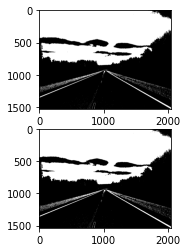

In [14]:
plt.figure(1)
plt.subplot(211)
plt.imshow(otsu,cmap='gray')

plt.subplot(212)
plt.imshow(binary_img,cmap='gray')
plt.show()
            

#영상 라벨링
- 해당 링크의 영상을 읽은 후 img로 저장하시오
- R channel 값을 input_img로 저장하시오


--2020-10-27 18:44:41--  https://i.imgur.com/iWGMlJR.png
Resolving i.imgur.com (i.imgur.com)... 151.101.24.193
Connecting to i.imgur.com (i.imgur.com)|151.101.24.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491 [image/png]
Saving to: ‘iWGMlJR.png’

iWGMlJR.png         100%[===================>]     491  --.-KB/s    in 0s      

2020-10-27 18:44:41 (26.0 MB/s) - ‘iWGMlJR.png’ saved [491/491]



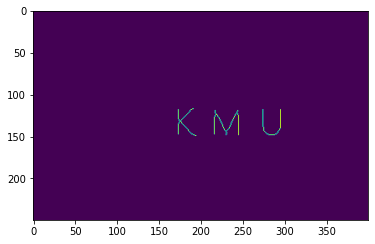

In [3]:
!wget https://i.imgur.com/iWGMlJR.png
!mv iWGMlJR.png sample.png
img = cv2.imread('sample.png')

#R channel만을 input_img로 저장하고 가시화하시오
input_img = img[:, :, 0]
plt.imshow(input_img)

# 4연결성과 8연결성 라벨링 출력 예시
## 숫자로 표시
![alt text](https://i.imgur.com/lQ9nXox.png)
## 색상으로 표시
![alt text](https://i.imgur.com/91M3MwP.png)

# 과제1: 4연결성 라벨링

## 위의 4연결성(4-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
## cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.

In [6]:
#input_img에 대한 4연결성 라벨링 함수를 작성하시오
height, width = input_img.shape
labeled_img = np.zeros((height, width))
for i in range(0, height):
  for j in range(0, width):
    if i==0 or j==0 or i==height-1 or j==width-1:
      labeled_img[i][j] == 0
    elif input_img[i][j] == 255:
      labeled_img[i][j] = -1
    else:
      labeled_img[i][j] = 0

def flood_fill4(L, i, j, label):
  if L[i][j] == -1:
    L[i][j] = label
    flood_fill4(L, i, j+1, label) # 오른쪽
    flood_fill4(L, i-1, j, label) # 위쪽
    flood_fill4(L, i, j-1, label) # 왼쪽
    flood_fill4(L, i+1, j, label) # 아래쪽
  else:
    return 

def four_connect():
    label = 1
    for i in range(1, height-1):
      for j in range(1, width-1):
        if labeled_img[i][j] == -1:
          flood_fill4(labeled_img, i, j, label)
          label += 1
    return labeled_img
four_connect()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##다른 색상을 갖는 영상을 가시화하기 위한 프로그램 작성
  - matplotlib를 이용하여 가시화하시오

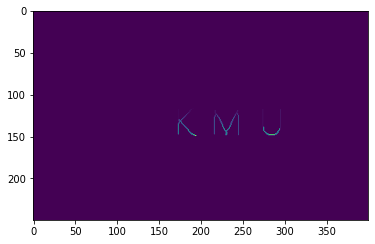

In [7]:
plt.imshow(labeled_img)

과제2: 8연결성 라벨링
위의 8연결성(8-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.

In [8]:
#input_img에 대한 8연결성 라벨링 함수를 작성하시오

labeled_img = np.zeros((height, width))
for i in range(0, height):
  for j in range(0, width):
    if i==0 or j==0 or i==height-1 or j==width-1:
      labeled_img[i][j] == 0
    elif input_img[i][j] == 255:
      labeled_img[i][j] = -1
    else:
      labeled_img[i][j] = 0

def flood_fill8(L, i, j, label):
  if L[i][j] == -1:
    L[i][j] = label
    flood_fill8(L, i, j+1, label) # 오른쪽
    flood_fill8(L, i-1, j, label) # 위쪽
    flood_fill8(L, i, j-1, label) # 왼쪽
    flood_fill8(L, i+1, j, label) # 아래쪽
    flood_fill8(L, i-1, j+1, label) # 위오른쪽 대각선
    flood_fill8(L, i+1, j-1, label) # 위왼쪽 대각선
    flood_fill8(L, i-1, j-1, label) # 아래왼쪽 대각선
    flood_fill8(L, i+1, j+1, label) # 아래오른쪽 대각선
  else:
    return 

def eight_connect():
    label = 1
    for i in range(1, height-1):
      for j in range(1, width-1):
        if labeled_img[i][j] == -1:
          flood_fill8(labeled_img, i, j, label)
          label += 1
    return labeled_img

eight_connect()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##다른 색상을 갖는 영상을 가시화하기 위한 프로그램 작성

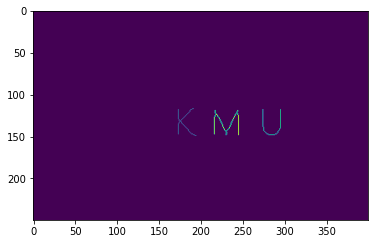

In [9]:
plt.imshow(labeled_img)